In [1]:
import pandas as pd


In [2]:
#1. Load the data
df = pd.read_csv('zillow_listings.csv')

In [3]:
# 2. Drop duplicates based on address or URL
df.drop_duplicates(subset=['address', 'url'], inplace=True)

In [4]:
# 3. Clean and convert numeric fields
def clean_price(p):
    if pd.isna(p):
        return None
    return int(''.join(filter(str.isdigit, str(p))))

In [5]:
df['price'] = df['price'].apply(clean_price)
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')


In [6]:
# 4. Handle missing values (optional)
df.fillna({'beds': 0, 'baths': 0, 'area': 0}, inplace=True)

In [7]:
print(df.head(50))  


                                             address    price  beds  baths  \
0               3030 W Christy Dr, Phoenix, AZ 85029   428000   3.0   2.00   
1                4317 E Ludlow Dr, Phoenix, AZ 85032   699900   3.0   2.00   
2                  9641 N 36th Dr, Phoenix, AZ 85051   365000   3.0   2.00   
3                17244 N 29th Ave, Phoenix, AZ 85053   350000   3.0   2.00   
4         3102 E Desert Broom Way, Phoenix, AZ 85048  1100000   4.0   2.50   
5      2531 W Saint Catherine Ave, Phoenix, AZ 85041   424999   4.0   2.50   
6           5850 W Cheery Lynn Rd, Phoenix, AZ 85031   273000   4.0   2.00   
7                10844 N 37th Way, Phoenix, AZ 85028   725000   5.0   3.00   
8                 1202 E Libby St, Phoenix, AZ 85022   565900   4.0   3.00   
9            1706 E John Cabot Rd, Phoenix, AZ 85022   139900   3.0   2.00   
10              12043 N 46th Ave, Glendale, AZ 85304   425000   4.0   2.00   
11                 1808 W Rose Ln, Phoenix, AZ 85015   365000   

In [8]:
print(df.shape)



(820, 9)


In [9]:
# Basic summary statistics for numeric columns
print(df.describe())


              price        beds       baths          area    latitude  \
count  8.200000e+02  820.000000  820.000000    820.000000  820.000000   
mean   7.272743e+05    3.330488    2.356402   1905.328049   33.529623   
std    1.651274e+06    1.023197    0.969564   1106.080565    0.120219   
min    1.500000e+02    0.000000    0.000000      0.000000   33.293774   
25%    3.350000e+05    3.000000    2.000000   1288.250000   33.455520   
50%    4.294500e+05    3.000000    2.000000   1672.500000   33.513466   
75%    6.092500e+05    4.000000    2.500000   2180.500000   33.633220   
max    3.000000e+07   11.000000   11.000000  10170.000000   33.801050   

        longitude  
count  820.000000  
mean  -112.078211  
std      0.072137  
min   -112.299910  
25%   -112.129051  
50%   -112.074115  
75%   -112.017360  
max   -111.953674  


In [11]:
# Step 1: Generate summary statistics
summary = df[['price', 'beds', 'baths', 'area', 'latitude', 'longitude']].describe()


In [12]:
# Step 2: Format the summary statistics nicely
formatted_summary = summary.applymap(lambda x: f"{x:,.2f}")

C:\Users\kotte\AppData\Local\Temp\ipykernel_38684\1767330940.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary = summary.applymap(lambda x: f"{x:,.2f}")


In [13]:
# Step 2: Format the numbers nicely using .apply + .map
formatted_summary = summary.apply(lambda col: col.map(lambda x: f"{x:,.2f}"))

In [14]:
# Step 3: Display the result
print(formatted_summary)

               price    beds   baths       area latitude longitude
count         820.00  820.00  820.00     820.00   820.00    820.00
mean      727,274.29    3.33    2.36   1,905.33    33.53   -112.08
std     1,651,274.28    1.02    0.97   1,106.08     0.12      0.07
min           150.00    0.00    0.00       0.00    33.29   -112.30
25%       335,000.00    3.00    2.00   1,288.25    33.46   -112.13
50%       429,450.00    3.00    2.00   1,672.50    33.51   -112.07
75%       609,250.00    4.00    2.50   2,180.50    33.63   -112.02
max    30,000,000.00   11.00   11.00  10,170.00    33.80   -111.95


In [15]:
# Price Trend by Number of Bedrooms
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Convert price to numeric if it's not already
df['price'] = pd.to_numeric(df['price'], errors='coerce')

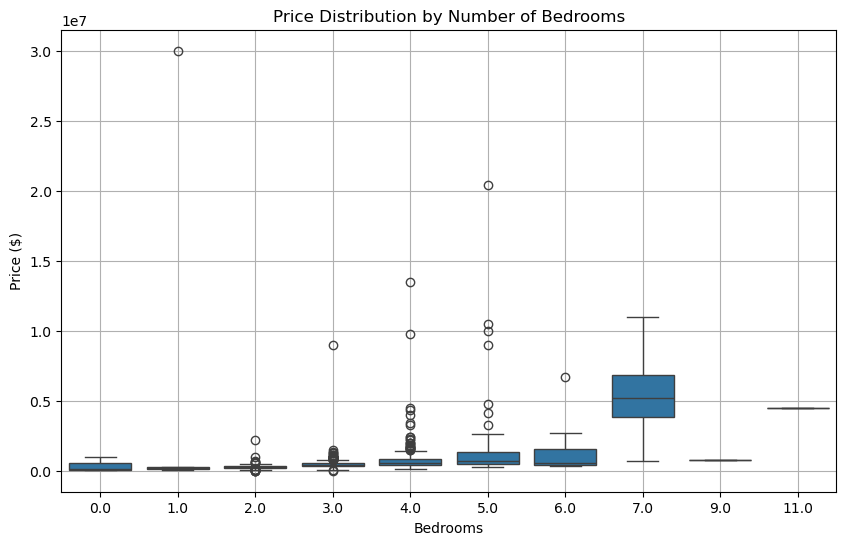

In [17]:
# Boxplot of price per bedroom count
plt.figure(figsize=(10, 6))
sns.boxplot(x='beds', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [18]:
# Count of Listings by Zipcode
# Extract zip code
df['zipcode'] = df['address'].str.extract(r'(\d{5})')

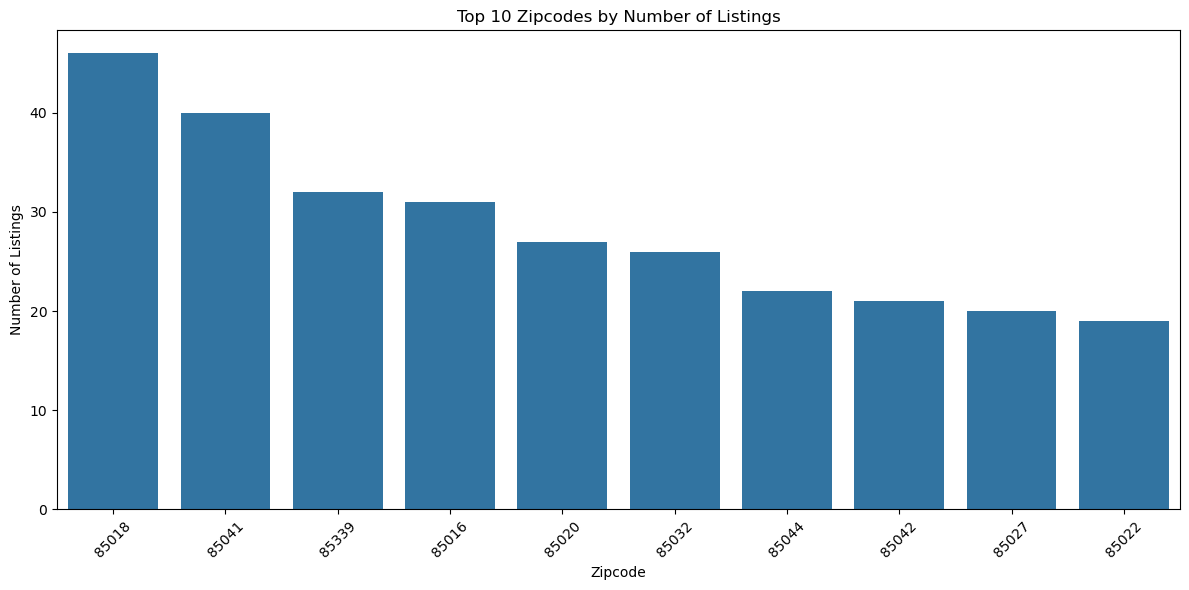

In [19]:
# Countplot
plt.figure(figsize=(12, 6))
top_zipcodes = df['zipcode'].value_counts().nlargest(10)
sns.barplot(x=top_zipcodes.index, y=top_zipcodes.values)
plt.title('Top 10 Zipcodes by Number of Listings')
plt.xlabel('Zipcode')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

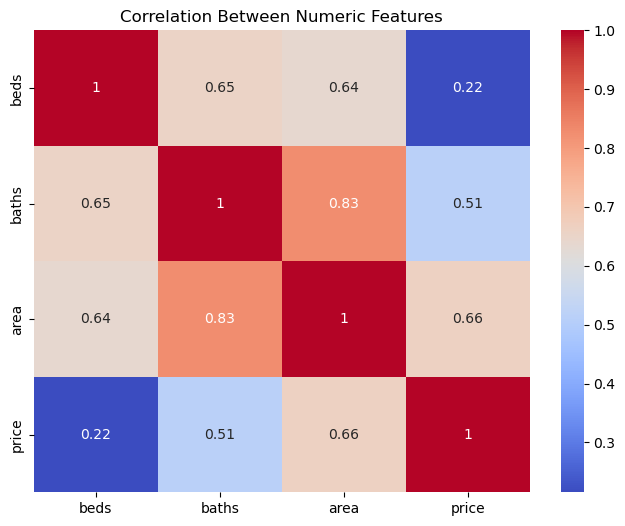

In [20]:
#Correlation Heatmap(beds,bath,area,price)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['beds', 'baths', 'area', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()
